In [152]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.patches import Rectangle
from matplotlib.cm import get_cmap
import numpy as np
import GPy
from sklearn import preprocessing

colors = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

In [275]:
# Function to sample values from a gaussian process kernel
def gen_grid(k, side_len, normalize = True):
	# Create grid using xmin and xmax
	xs, ys = np.mgrid[0:side_len, 0:side_len]

	X = np.vstack((xs.flatten(), ys.flatten())).T 

	# Compute covariance matrix of X
	K = k.K(X)

	# GP prior distribution
	grid_vals = np.random.multivariate_normal(np.zeros(X.shape[0]), K)

	# Set min-max range for scaler

	min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

	# Scale to range
	if normalize==True:
		grid_vals = min_max_scaler.fit_transform(grid_vals.reshape(-1, 1)).ravel()
	
	return grid_vals.reshape(*xs.shape)


def plot_grid(fig, grid, frame_kwargs=None, mask=None, highlight=None, save_as=''):
	fig.subplots_adjust(left=.05, right=.95, bottom=.05, top=.95)
	ax = fig.add_subplot(111, aspect='equal')

	# Major ticks
	_ = np.arange(grid.shape[0]+1)
	ax.set_xticks(_, [])
	ax.set_yticks(_, [])

	# Minor ticks
	_ = np.arange(grid.shape[0]+1)
	ax.set_xticks(_, minor=True)
	ax.set_yticks(_, minor=True)

	# Remove ticks
	ax.tick_params(axis='both', which='both',length=0)
	ax.tick_params(which='minor', bottom=False, left=False, top=False, right=False)

	# Remove spines
	for key, spine in ax.spines.items():
		spine.set_visible(False)

	if frame_kwargs:
		fig.patch.set_linewidth(frame_kwargs['linewidth'])
		fig.patch.set_edgecolor(frame_kwargs['edgecolor'])

	# Display values
	cmap = get_cmap('OrRd')	
	rgrid = np.round(grid).astype(int).astype(str)
	if mask is None:
		mask = np.zeros_like(grid)
	if highlight is None:
		highlight = np.zeros_like(grid)
	for r in range(grid.shape[0]):
		for c in range(grid.shape[1]):
			fill = cmap(grid[r, c]/120)
			if mask[r, c]:
				fill = 'white'
			else:
				ax.text(x=c+.47, y=r+.45, s=rgrid[r, c], ha='center', va='center', fontsize=14)
			ax.add_patch(Rectangle((c, r+.05), .90, .90, facecolor=fill, edgecolor='k' if highlight[r, c] else 'lightgray'))
	
	if save_as:
		fig.savefig(save_as)

# Example grid

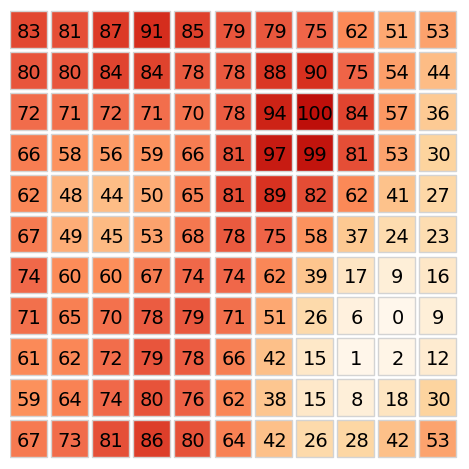

In [276]:
np.random.seed(2)

g = gen_grid(
	k = GPy.kern.RBF(input_dim=2, variance=1, lengthscale=2),
	side_len = 11
) * 100

mask = np.zeros_like(g)
plot_grid(
	fig = plt.figure('example-grid', figsize=[5, 5]),
	grid = g,
	mask = mask,
	save_as = '../plots/cogsci/f1a_example-grid.pdf'
)

# Control condition

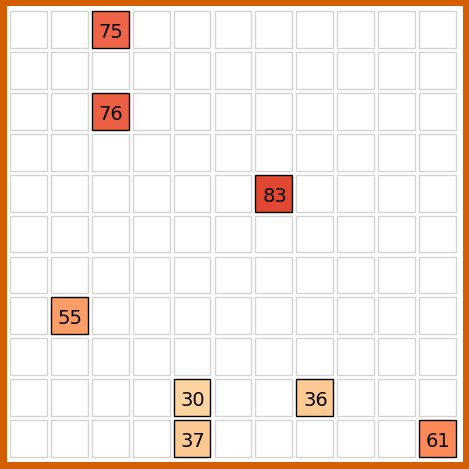

In [277]:
np.random.seed(1) #3

g = gen_grid(
	k = GPy.kern.RBF(input_dim=2, variance=1, lengthscale=2),
	side_len = 11
) * 100

mask = np.ones_like(g)
for i in range(9):
    x, y = np.random.randint(0, 11, 2)
    mask[x, y] = 0

plot_grid(
	fig = plt.figure('control-condition', figsize=[5, 5]),
	grid = g,
	frame_kwargs = dict(linewidth=10, edgecolor=colors[-2]),
	mask = mask,
	highlight = np.abs(mask - 1), # to swap 0s and 1s in mask and thus highlight unmasked cells
	save_as = '../plots/cogsci/f1c_control-condition.pdf'
)

# Memory condition

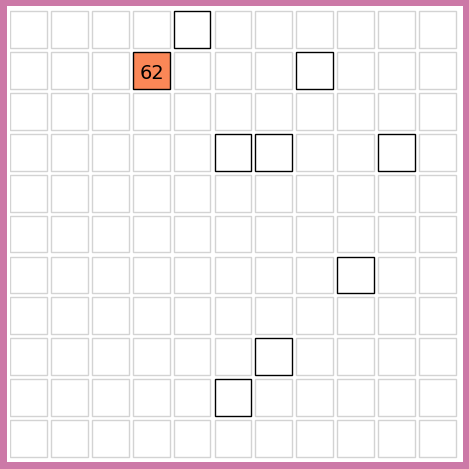

In [278]:
np.random.seed(3)

g = gen_grid(
	k = GPy.kern.RBF(input_dim=2, variance=1, lengthscale=2),
	side_len = 11
) * 100

highlight = np.zeros_like(g)
for i in range(9):
    x, y = np.random.randint(0, 11, 2)
    highlight[x, y] = 1
mask = np.ones_like(g)
mask[x, y] = 0

plot_grid(
	fig = plt.figure('memory-condition', figsize=[5, 5]),
	grid = g,
	frame_kwargs = dict(linewidth=10, edgecolor=colors[-1]),
	mask = mask,
	highlight = highlight,
	save_as = '../plots/cogsci/f1d_memory-condition.pdf'
)

# Task design

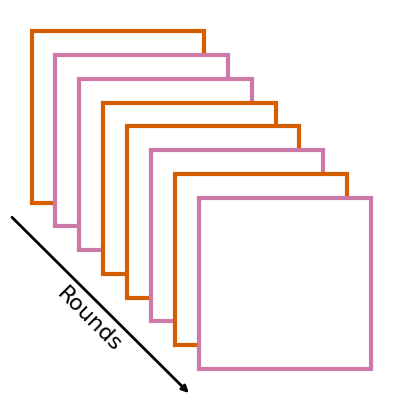

In [281]:
np.random.seed(2)
fig = plt.figure('task-design', figsize=[5, 5])
ax = fig.add_subplot(111)

# Major ticks
_ = np.arange(10)
ax.set_xticks(_, [])
ax.set_yticks(_, [])

cond = np.random.randint(0, 2, 8)
cond_colors = colors[-2:]
for i in range(8):
    ax.add_patch(
        Rectangle((0.5+i/1.8, 4.5-i/1.8), 4, 4, facecolor='white', edgecolor=cond_colors[cond[i]], linewidth=3)
    )

ax.annotate('', xy=(4.2, 0), xycoords='data', xytext=(0, 4.2), textcoords='data', arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', linewidth=2))

ax.text(s='Rounds', x=1, y=1, fontsize=16, rotation=-45)

plt.axis('off')

fig.savefig('../plots/cogsci/f1b_task-design.pdf')